In [20]:
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Nadam
from keras.models import Sequential
from keras.losses import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

from perceptron_forecast import Perceptron

In [26]:
data = pd.read_csv("input/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [27]:
data['Formatted Date'] = data['Formatted Date'].str.replace(r'\.\d{3}\s\+\d{4}', '', regex=True)

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], format='%Y-%m-%d %H:%M:%S').dt.date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], infer_datetime_format=True)

data['DayOfYear'] = pd.to_datetime(data['Formatted Date']).dt.dayofyear

C:\Users\Omid\AppData\Local\Temp\ipykernel_10176\1833778225.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], infer_datetime_format=True)


In [28]:
data.drop(['Daily Summary', 'Summary', 'Precip Type'], axis=1, inplace=True)

data = data.groupby('Formatted Date').mean().reset_index()

data.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DayOfYear
0,2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167,1.0
1,2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667,2.0
2,2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000,3.0
3,2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667,4.0
4,2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333,5.0


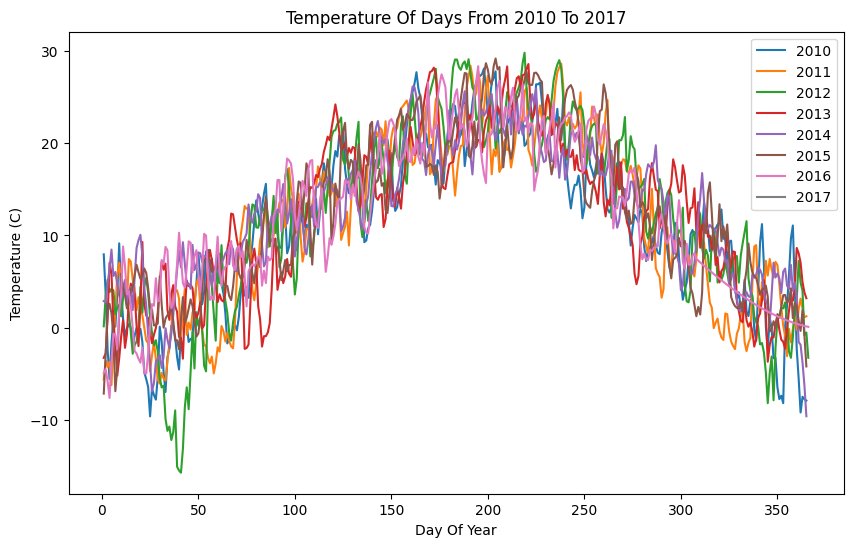

In [29]:
plt.figure(figsize=(10, 6))
plt.xlabel('Day Of Year')
plt.ylabel('Temperature (C)')
plt.title('Temperature Of Days From 2010 To 2017')

for year in range(2010, 2018):
    yearly_data = data[data['Formatted Date'].dt.year == year]
    plt.plot(yearly_data['DayOfYear'], yearly_data['Temperature (C)'], label=str(year))

plt.legend()
plt.show()

In [30]:
data.corr()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DayOfYear
Formatted Date,1.000000,0.033440,0.033730,0.064660,-0.018462,-0.043753,0.130480,NaN,0.023316,0.091317
Temperature (C),0.033440,1.000000,0.995747,-0.590622,-0.139730,0.051811,0.575520,NaN,-0.000665,0.158705
Apparent Temperature (C),0.033730,0.995747,1.000000,-0.573652,-0.190833,0.050287,0.554627,NaN,0.006784,0.167355
Humidity,0.064660,-0.590622,-0.573652,1.000000,-0.059326,-0.017147,-0.693664,NaN,-0.006716,0.084541
Wind Speed (km/h),-0.018462,-0.139730,-0.190833,-0.059326,1.000000,0.159346,0.196635,NaN,-0.085750,-0.136642
Wind Bearing (degrees),-0.043753,0.051811,0.050287,-0.017147,0.159346,1.000000,0.099641,NaN,-0.043628,-0.031238
Visibility (km),0.130480,0.575520,0.554627,-0.693664,0.196635,0.099641,1.000000,NaN,0.056049,-0.097194
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.023316,-0.000665,0.006784,-0.006716,-0.085750,-0.043628,0.056049,NaN,1.000000,-0.033029
DayOfYear,0.091317,0.158705,0.167355,0.084541,-0.136642,-0.031238,-0.097194,NaN,-0.033029,1.000000


In [31]:
X = data[['DayOfYear', 'Visibility (km)']]
Y = data[['Temperature (C)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3214, 2), (804, 2), (3214, 1), (804, 1))

In [32]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

c:\Users\Omid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer=Nadam(), loss=mae)

In [34]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2124 - val_loss: 6.6517
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 5.9268 - val_loss: 6.0816
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 5.2051 - val_loss: 5.6982
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 4.5004 - val_loss: 4.5451
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 4.3619 - val_loss: 4.8880
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 4.1481 - val_loss: 4.3942
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 4.1715 - val_loss: 4.3675
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 4.1833 - val_loss: 5.2358
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 4.3351 - val_loss: 4.2519
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 4.1267 - val_loss: 4.1973
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 4.0921 - val_loss: 4.2792
Epoch 12/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [35]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3.0821
Test Loss: 3.1322531700134277


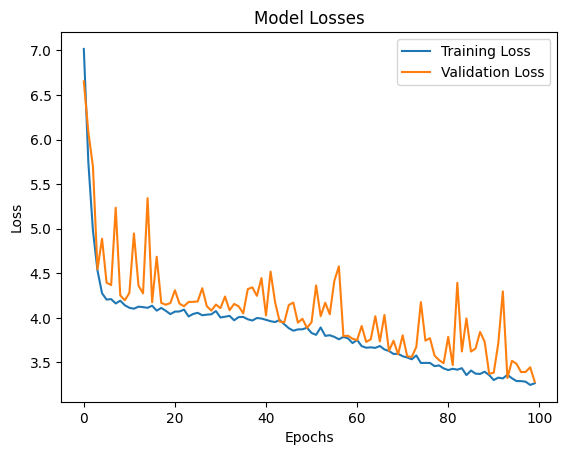

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
focused_year = data[data['Formatted Date'].dt.year == 2010]
Y_pred = model.predict(focused_year[['DayOfYear', 'Visibility (km)']])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


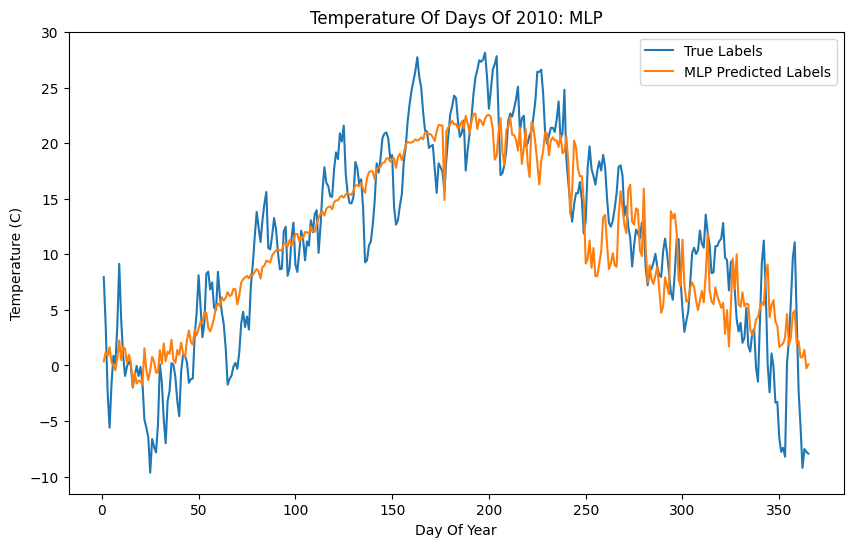

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(focused_year['DayOfYear'], focused_year['Temperature (C)'], label='True Labels')
plt.plot(focused_year['DayOfYear'], Y_pred, label='MLP Predicted Labels')
plt.title('Temperature Of Days Of 2010: MLP')
plt.ylabel('Temperature (C)')
plt.xlabel('Day Of Year')
plt.legend()
plt.show()

In [49]:
model.save('weather_predictions.h5')

In [40]:
X = data['DayOfYear'].values
Y = data['Temperature (C)'].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

perceptron = Perceptron(learning_rate_w=0.00001, learning_rate_b=0.0001, epochs=100)

In [43]:
weights, bias, w, b, losses = perceptron.fit(x_train=X_train, y_train=Y_train)

100%|██████████| 100/100 [00:03<00:00, 29.44it/s]


In [44]:
Y_pred_perceptron = [perceptron.predict(day) for day in focused_year['DayOfYear']]

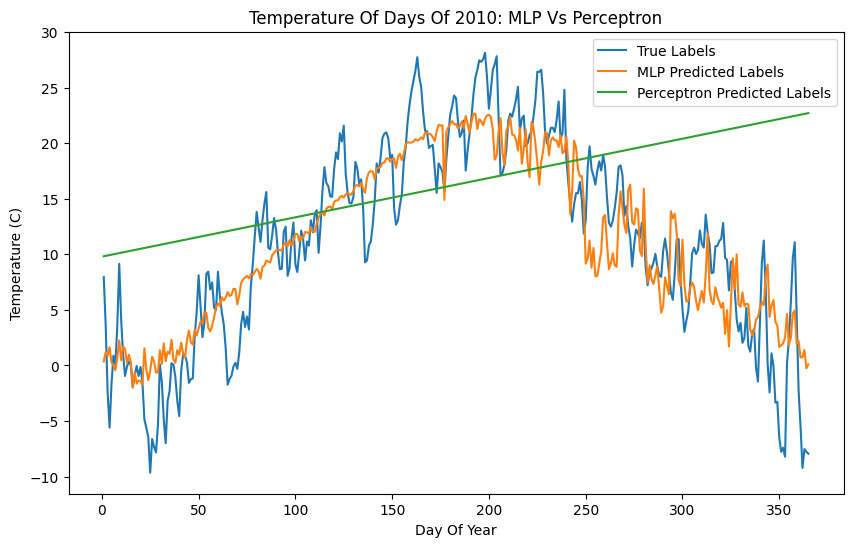

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(focused_year['DayOfYear'], focused_year['Temperature (C)'], label='True Labels')
plt.plot(focused_year['DayOfYear'], Y_pred, label='MLP Predicted Labels')
plt.plot(focused_year['DayOfYear'], Y_pred_perceptron, label='Perceptron Predicted Labels')
plt.title('Temperature Of Days Of 2010: MLP Vs Perceptron')
plt.ylabel('Temperature (C)')
plt.xlabel('Day Of Year')
plt.legend()
plt.show()